In [7]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from utils import *

In [8]:
def err_forcing(sigma, N, t, model='ours'):
    
    err = scipy.io.loadmat(f'./data/fig3_forcing/sigma{sigma}error_{N}.mat')

    # model name alternatives
    aliases = {'fno': ['fno', 'FNO'],
               'deep': ['deep', 'Deep', 'DeepONet', 'DeepOnet', 'DON', 'don'],
               'our': ['ours', 'our', 'Ours', 'ours']}
    
    for key, value in aliases.items():
        if model in value:
            model = key
            break

    # time index alternatives
    t_idx = int(t * 5) - 1      # t=[0.2, 0.4, 0.6, 0.8, 1.0]

    err = err[model][t_idx]
    return err


def err_ic(sigma, N, t, model='ours'):
    err = scipy.io.loadmat(f'./data/fig3_ic/{N}sigma{sigma}.mat')

    # model name alternatives
    aliases = {'fno': ['fno', 'FNO'],
               'deep': ['deep', 'Deep', 'DeepONet', 'DeepOnet', 'DON', 'don'],
               'our': ['ours', 'our', 'Ours', 'ours']}
    
    for key, value in aliases.items():
        if model in value:
            model = key
            break

    # time index alternatives
    t_idx = int(t * 5) - 1      # t=[0.2, 0.4, 0.6, 0.8, 1.0]

    err = err[model][t_idx]
    return err

In [9]:
# Color blind palette
sns.set_palette("colorblind")
palette = sns.color_palette("colorblind")

def lighten_color(color, amount=0.5):
    r, g, b = color
    return (1 - amount) * r + amount, (1 - amount) * g + amount, (1 - amount) * b + amount
    
palette_light = [lighten_color(c, amount=0.4) for c in palette]

Text(0.655, 1.12, 'Forcings as input')

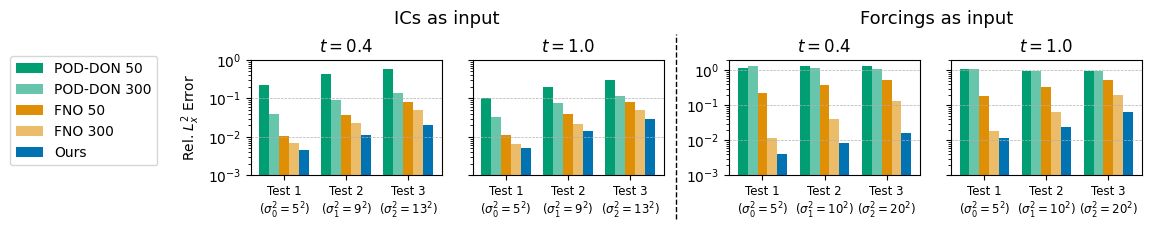

In [10]:
fig = plt.figure(figsize=(11.5, 1.5))
gs = gridspec.GridSpec(1, 5, width_ratios=[1, 1, 0.02, 1, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 3])
ax4 = fig.add_subplot(gs[0, 4])
ax = [ax1, ax2, ax3, ax4]

x = np.arange(3)
bar_width = 0.16

ts_ = [0.4, 1.0]


def plot_E(err_func, N, t, model):
    E = [err_func(5, N, t, model).mean(),         
         err_func(9, N, t, model).mean(),
         err_func(13, N, t, model).mean()]
    return E

def plot_E2(err_func, N, t, model):
    E = [err_func(5, N, t, model).mean(),         
         err_func(10, N, t, model).mean(),
         err_func(20, N, t, model).mean()]
    return E


ax1.set_title(rf'$t = {ts_[0]:.1f}$', fontsize=12)
ax1.bar(x - bar_width*2, plot_E(err_ic, 50, ts_[0], 'deep'), width=bar_width, label='POD-DON 50', color=palette[2])
ax1.bar(x - bar_width*1, plot_E(err_ic, 300, ts_[0], 'deep'), width=bar_width, label='POD-DON 300', color=palette_light[2])
ax1.bar(x              , plot_E(err_ic, 50, ts_[0], 'fno'), width=bar_width, label='FNO 50', color=palette[1])
ax1.bar(x + bar_width*1, plot_E(err_ic, 300, ts_[0], 'fno'), width=bar_width, label='FNO 300', color=palette_light[1])
ax1.bar(x + bar_width*2, plot_E(err_ic, 300, ts_[0], 'ours'), width=bar_width, label='Ours', color=palette[0])

ax2.set_title(rf'$t = {ts_[1]:.1f}$', fontsize=12)
ax2.bar(x - bar_width*2, plot_E(err_ic, 50, ts_[1], 'deep'), width=bar_width, label='POD-DON 50', color=palette[2])
ax2.bar(x - bar_width*1, plot_E(err_ic, 300, ts_[1], 'deep'), width=bar_width, label='POD-DON 300', color=palette_light[2])
ax2.bar(x              , plot_E(err_ic, 50, ts_[1], 'fno'), width=bar_width, label='FNO 50', color=palette[1])
ax2.bar(x + bar_width*1, plot_E(err_ic, 300, ts_[1], 'fno'), width=bar_width, label='FNO 300', color=palette_light[1])
ax2.bar(x + bar_width*2, plot_E(err_ic, 300, ts_[1], 'ours'), width=bar_width, label='Ours', color=palette[0])

ax3.set_title(rf'$t = {ts_[0]:.1f}$', fontsize=12)
ax3.bar(x - bar_width*2, plot_E2(err_forcing, 50, ts_[0], 'deep'), width=bar_width, label='POD-DON 50', color=palette[2])
ax3.bar(x - bar_width*1, plot_E2(err_forcing, 300, ts_[0], 'deep'), width=bar_width, label='POD-DON 300', color=palette_light[2])
ax3.bar(x              , plot_E2(err_forcing, 50, ts_[0], 'fno'), width=bar_width, label='FNO 50', color=palette[1])
ax3.bar(x + bar_width*1, plot_E2(err_forcing, 300, ts_[0], 'fno'), width=bar_width, label='FNO 300', color=palette_light[1])
ax3.bar(x + bar_width*2, plot_E2(err_forcing, 300, ts_[0], 'ours'), width=bar_width, label='Ours', color=palette[0])

ax4.set_title(rf'$t = {ts_[1]:.1f}$', fontsize=12)
ax4.bar(x - bar_width*2, plot_E2(err_forcing, 50, ts_[1], 'deep'), width=bar_width, label='POD-DON 50', color=palette[2])
ax4.bar(x - bar_width*1, plot_E2(err_forcing, 300, ts_[1], 'deep'), width=bar_width, label='POD-DON 300', color=palette_light[2])
ax4.bar(x              , plot_E2(err_forcing, 50, ts_[1], 'fno'), width=bar_width, label='FNO 50', color=palette[1])
ax4.bar(x + bar_width*1, plot_E2(err_forcing, 300, ts_[1], 'fno'), width=bar_width, label='FNO 300', color=palette_light[1])
ax4.bar(x + bar_width*2, plot_E2(err_forcing, 300, ts_[1], 'ours'), width=bar_width, label='Ours', color=palette[0])


for i in range(4):
    ax[i].set_yscale('log')
    ax[i].set_xticks(x)
    ax[i].yaxis.grid(True, linestyle='--', linewidth=0.5)

ax[0].set_xticklabels(['Test 1\n$(\sigma^2_0=5^2)$', 'Test 2\n$(\sigma^2_1=9^2)$', 'Test 3\n$(\sigma^2_2=13^2)$'], fontsize=8.5)
ax[1].set_xticklabels(['Test 1\n$(\sigma^2_0=5^2)$', 'Test 2\n$(\sigma^2_1=9^2)$', 'Test 3\n$(\sigma^2_2=13^2)$'], fontsize=8.5)

ax[2].set_xticklabels(['Test 1\n$(\sigma^2_0=5^2)$', 'Test 2\n$(\sigma^2_1=10^2)$', 'Test 3\n$(\sigma^2_2=20^2)$'], fontsize=8.5)
ax[3].set_xticklabels(['Test 1\n$(\sigma^2_0=5^2)$', 'Test 2\n$(\sigma^2_1=10^2)$', 'Test 3\n$(\sigma^2_2=20^2)$'], fontsize=8.5)


ax[0].set_yticks([1e-3, 1e-2, 1e-1, 1])
ax[0].set_ylim(top=1)
ax[1].set_yticks([1e-3, 1e-2, 1e-1, 1])
ax[1].set_ylim(top=1)
ax[1].set_yticklabels([])

ax[2].set_yticks([1e-3, 1e-2, 1e-1, 1])
ax[2].set_ylim(top=2)
ax[3].set_yticks([1e-3, 1e-2, 1e-1, 1])
ax[3].set_ylim(top=2)
ax[3].set_yticklabels([])

ax[0].set_ylabel('Rel. $L_x^2$ Error')


handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(0.05, 0.54), ncol=1, fontsize=10)


line = Line2D(
    [0.495, 0.495], 
    [-0.18, 1.05],  
    transform=fig.transFigure, 
    color='black',
    linestyle='--',
    linewidth=1,
    alpha=1
)

fig.add_artist(line)
fig.text(0.25, 1.12, 'ICs as input', fontsize=13)
fig.text(0.655, 1.12, 'Forcings as input', fontsize=13)